El Observatorio de Movilidad y Seguridad Vial (OMSV), centro de estudios que se encuentra bajo la órbita de la Secretaría de Transporte del Gobierno de la Ciudad Autónoma de Buenos Aires, nos solicita la elaboración de un proyecto de anális de datos, con el fin de generar información que le permita a las autoridades locales tomar medidas para disminuir la cantidad de víctimas fatales de los siniestros viales. Para ello, nos disponibilizan un dataset sobre homicidios en siniestros viales acaecidos en la Ciudad de Buenos Aires durante el periodo 2016-2021. Este dataset se encuentra en formato xlsx y contiene dos hojas llamadas: hechos y víctimas. Asimismo, observarán que incluye otras dos hojas adicionales de diccionarios de datos, que les podrá servir de guía para un mayor entendimiento de la data compartida.

Por su parte, en la sección Material de apoyo podrán encontrar más información de interés relativa a los datos disponibilizados y al Observatorio que nos encomienda el trabajo.


Propuesta de trabajo -mínimos entregables tech-
Es importante que a la hora de empezar a desarrollar cada item, y tu demo, te ayudes tambien de la rúbrica de evaluación. 😄

EDA (Exploratory Data Analysis)
Debes realizar un análisis exploratorio de los datos en un notebook. Tienen que estar tus pasos documentados con claridad, con las conclusiones correspondientes en cada gráfico empleado y análisis de lo que vas observando, utilizando celdas Markdown para tal fin. La prolijidad del notebook será un aspecto a evaluar. Es importante que tengas en cuenta que, en muchas oportunidades y trabajos, un EDA constituye un entregable en sí mismo.

En esta línea, hay varios aspectos indispensables que deben ser abordados en cualquier Análisis Exploratorio de Datos y tomaremos como punto de partida para evaluar tu performance en este apartado. Entre estos aspectos destacados se encuentran: búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados. Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial.

En caso de hacer uso de librerías como pandas_profiling, es indispensable acompañar los gráficos con análisis propios.

Dashboard
Debe ser funcional y coherente con el storytelling. El dasbhoard tiene que incluir filtros, permitiendo explorar detalladamente los datos con la selección de cada uno de ellos. Es decir, es indispensable que sea interactivo. También, se espera que el diseño que implementen facilite la interpretación de la información y su análisis, siendo importante, para ello, la claridad en la presentación de los datos, aspectos inherentes a la esteticidad, elección coherente de los gráficos según las variables a visualizar, entre otros ítems.

KPIs
Debes graficar y medir los 2 KPIs propuestos a continuación, representándolos adecuadamente en el dashboard. A su vez, tambíen tienes que proponer, medir y graficar un tercer KPI que consideres relevante para la temática. Los dos KPIs propuestos son:

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior
Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior
Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

MUY IMPORTANTE repasar qué es un KPI y cómo se diferencia de una métrica convencional. En el material de apoyo tienen lectura que puede ser de ayuda.

En este archivo haremos el eda

In [6]:
#Imports

import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt

In [2]:
#Cargamos el merged_df.csv que creamos tras aplicar ETL a los datos

df = pd.read_csv('merged_df.csv')


In [4]:
#Creamos el reporte de sweetviz

report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

c:\Users\Esteban Ramos\Desktop\PI Data Analysis\venv\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
c:\Users\Esteban Ramos\Desktop\PI Data Analysis\venv\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
c:\Users\Esteban Ramos\Desktop\PI Data Analysis\venv\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
c:\Users\Esteban Ramos\Desktop\PI Data Analysis\venv\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWar

In [5]:
#Exportamos el reporte a un archivo HTML

report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
#Tras hacernos una idea con Sweetviz, vamos a hacer un análisis más detallado de los datos

#Vamos a ver el número de filas y columnas que tiene el dataset

print(df.shape)

(657, 18)


In [8]:
#Vamos a ver los tipos de datos que tenemos en el dataset

print(df.dtypes)

N_VICTIMAS        int64
FECHA_x          object
AAAA              int64
MM                int64
DD                int64
HORA             object
HH                int64
TIPO_DE_CALLE    object
COMUNA            int64
pos x            object
pos y            object
PARTICIPANTES    object
VICTIMA_x        object
ACUSADO          object
ROL              object
VICTIMA_y        object
SEXO             object
EDAD              int64
dtype: object


In [9]:
#Vamos a ver los valores nulos que tenemos en el dataset

print(df.isnull().sum())

N_VICTIMAS       0
FECHA_x          0
AAAA             0
MM               0
DD               0
HORA             0
HH               0
TIPO_DE_CALLE    0
COMUNA           0
pos x            0
pos y            0
PARTICIPANTES    0
VICTIMA_x        0
ACUSADO          0
ROL              0
VICTIMA_y        0
SEXO             0
EDAD             0
dtype: int64


In [10]:
#Vamos a ver los valores únicos que tenemos en el dataset

print(df.nunique())

N_VICTIMAS         3
FECHA_x          563
AAAA               6
MM                12
DD                31
HORA             310
HH                24
TIPO_DE_CALLE      3
COMUNA            15
pos x            567
pos y            567
PARTICIPANTES     37
VICTIMA_x          9
ACUSADO           10
ROL                4
VICTIMA_y          7
SEXO               2
EDAD              85
dtype: int64


In [14]:
#Vemos si VICTIMA_x y VICTIMA_y tienen los mismos valores

print(df['VICTIMA_x'].equals(df['VICTIMA_y']))

False


In [15]:
#Vemos las diferencias entre VICTIMA_x y VICTIMA_y

print(df['VICTIMA_x'].compare(df['VICTIMA_y']))

            self   other
213  OBJETO FIJO    AUTO
214  OBJETO FIJO    AUTO
546  PEATON_MOTO  PEATON
547  PEATON_MOTO    MOTO


Text(0.5, 0, 'SEXO')

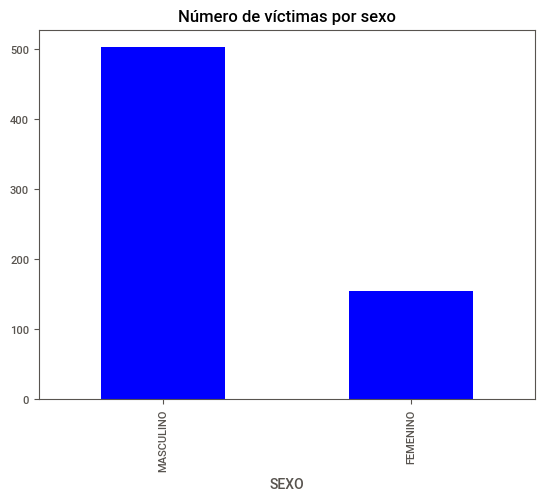

In [21]:
#Empezamos los graficos del EDA

#Vamos a ver el número de víctimas por sexo

df['SEXO'].value_counts().plot(kind='bar', color='blue')
plt.title('Número de víctimas por sexo')
plt.xlabel('SEXO')


Text(0.5, 0, 'EDAD')

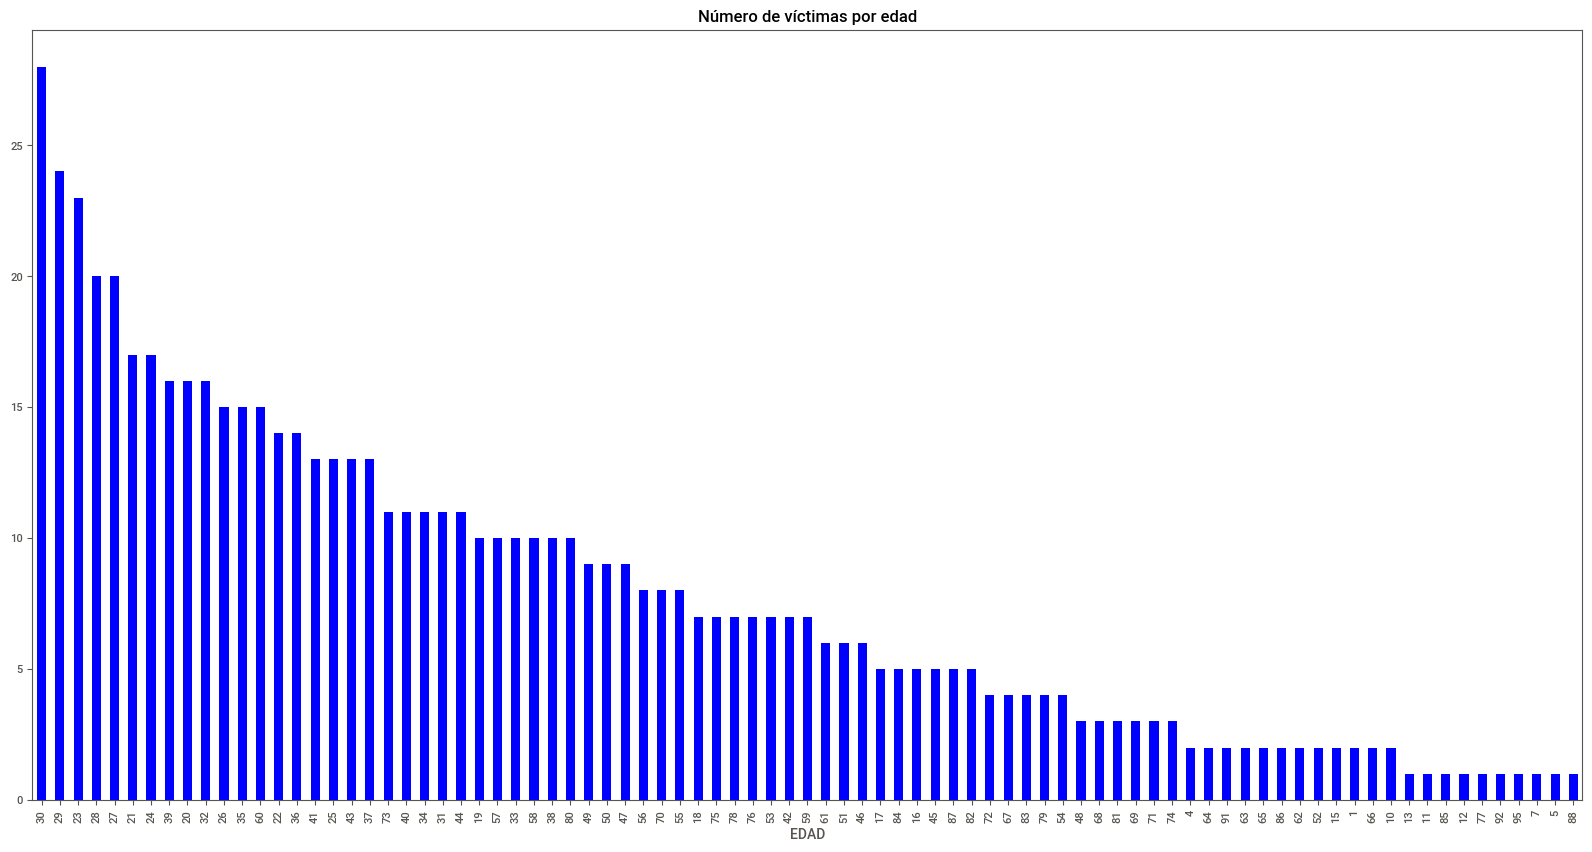

In [29]:
#Vamos a ver el número de víctimas por edad

df['EDAD'].value_counts().plot(kind='bar', color='blue', figsize=(20,10))
plt.title('Número de víctimas por edad')
plt.xlabel('EDAD')

<Axes: xlabel='COMUNA'>

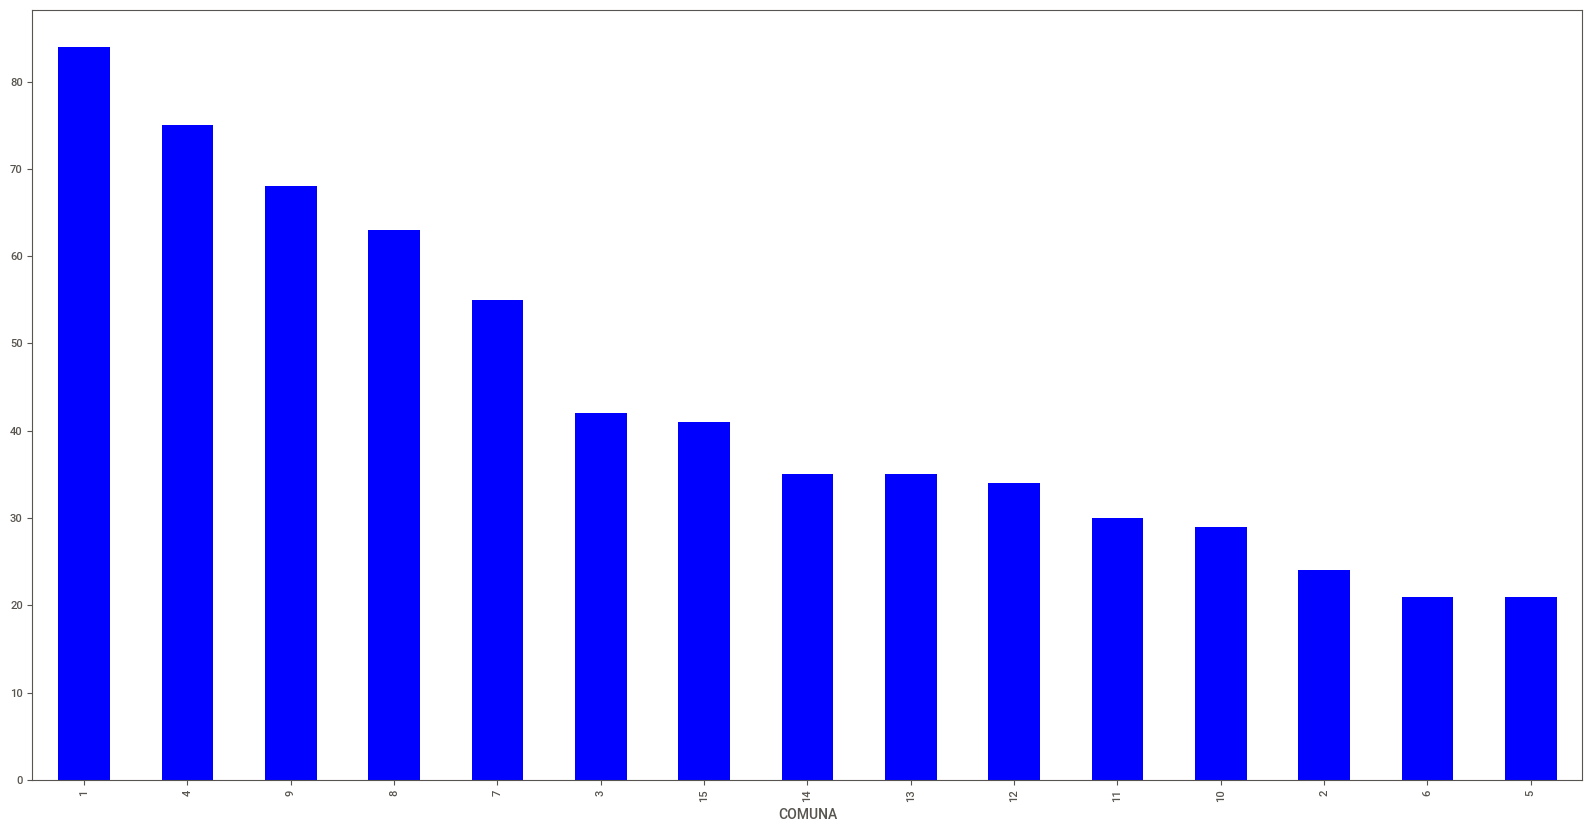

In [30]:
#Vemos en que comuna fue el mayor número de hechos

df['COMUNA'].value_counts().plot(kind='bar', color='blue', figsize=(20,10))

Text(0.5, 1.0, 'Mayo número de hechos por año')

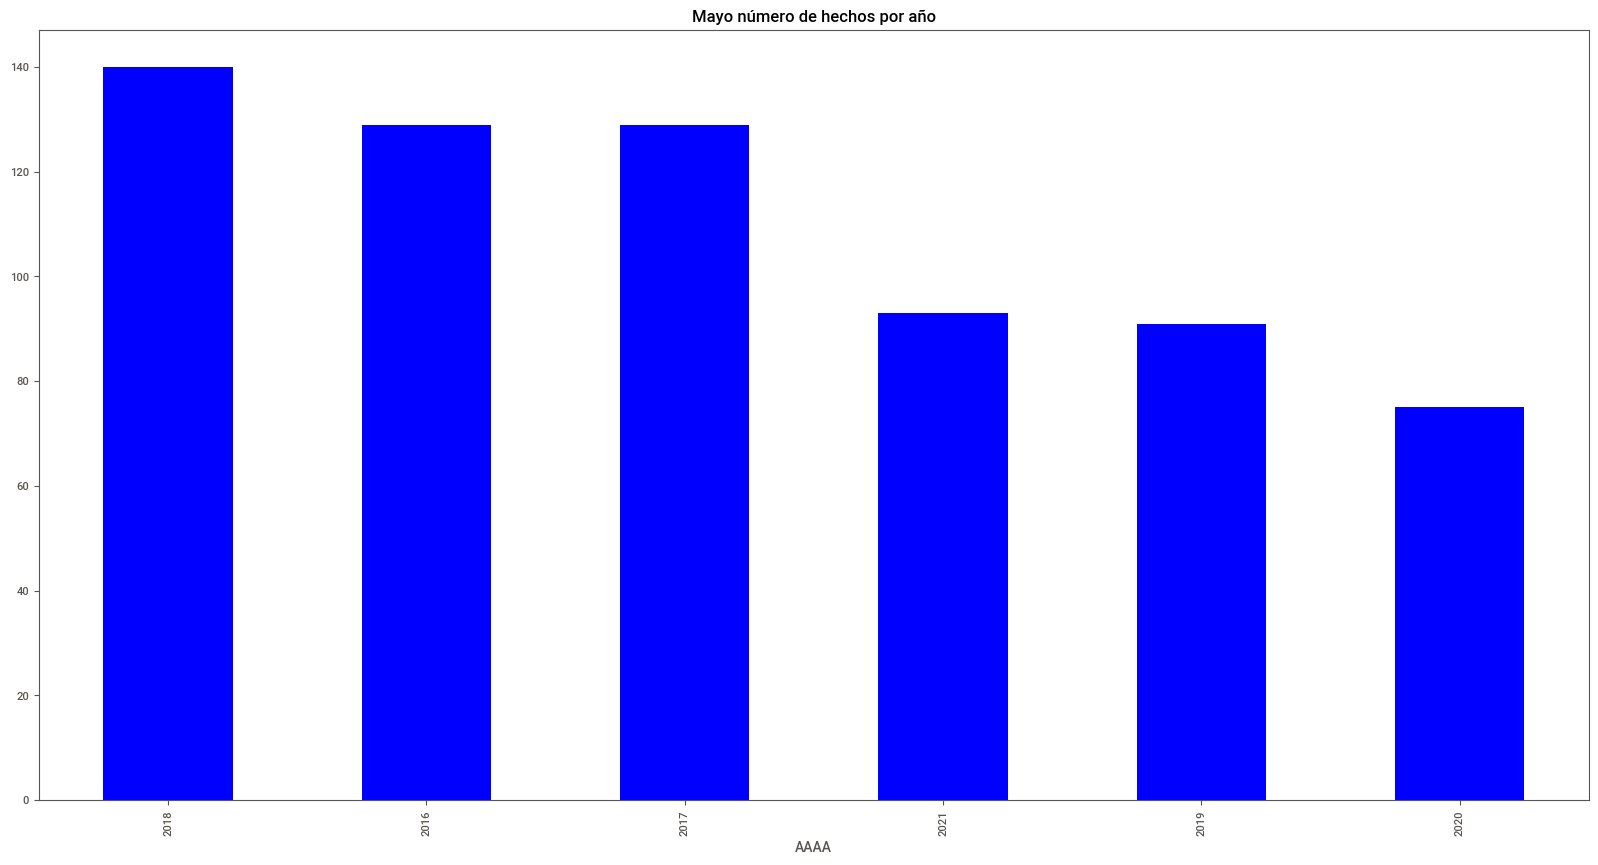

In [33]:
#Vemos en que año fue el mayor número de hechos

df['AAAA'].value_counts().plot(kind='bar', color='blue', figsize=(20,10))
plt.title('Mayo número de hechos por año')


Text(0.5, 1.0, 'Mayo número de hechos por mes')

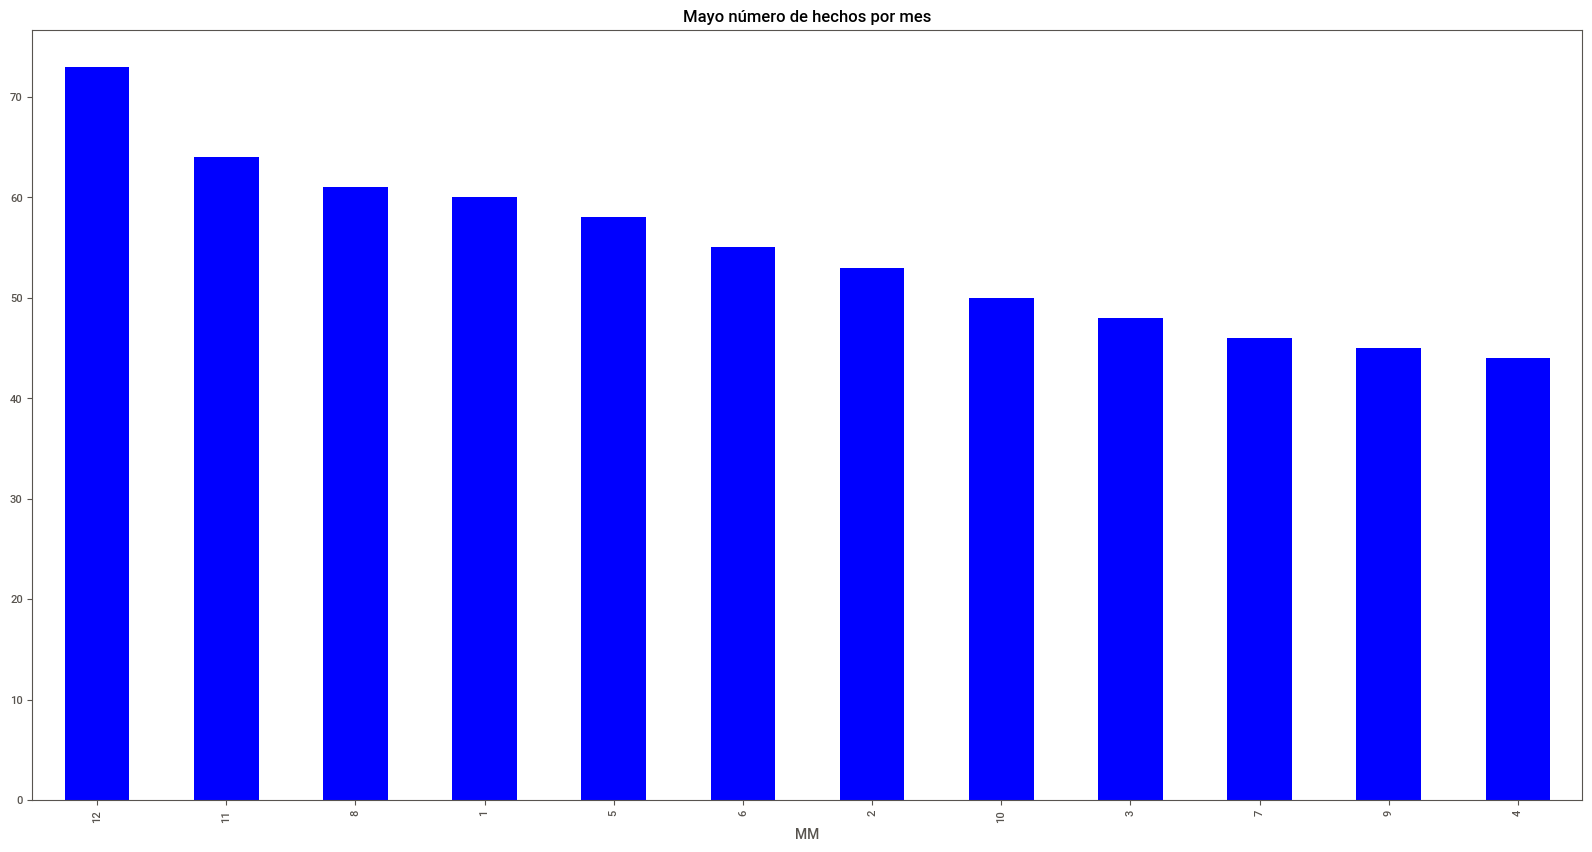

In [34]:
#Vemos en que mes fue el mayor número de hechos

df['MM'].value_counts().plot(kind='bar', color='blue', figsize=(20,10))
plt.title('Mayo número de hechos por mes')

Text(0.5, 1.0, 'Porcentaje de hechos en "CALLES"')

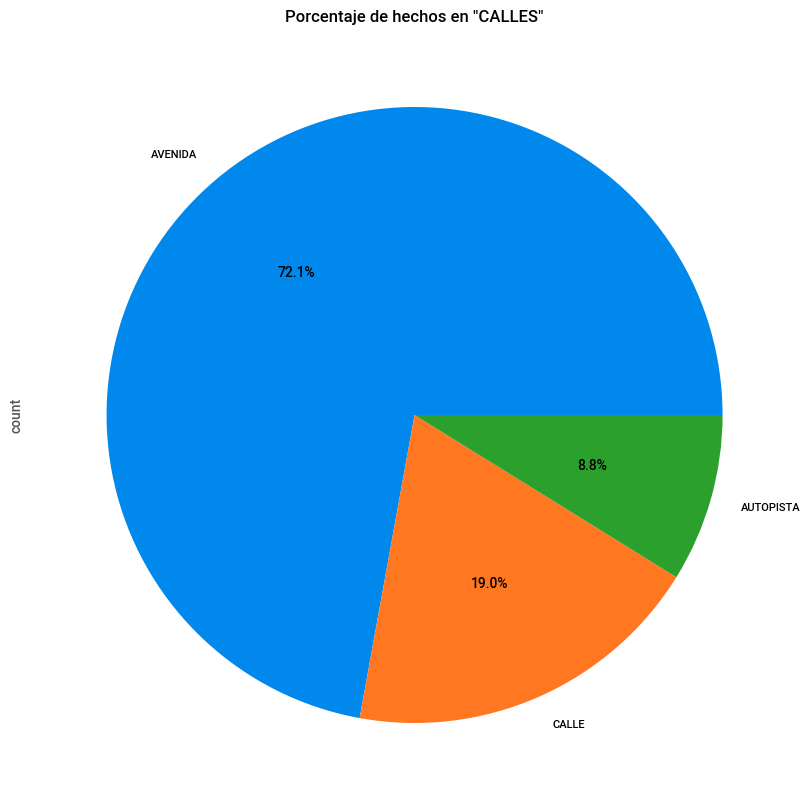

In [38]:
#Vemos el porcentaje de hechos en "CALLES"

df['TIPO_DE_CALLE'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(20,10))
plt.title('Porcentaje de hechos en "CALLES"')

Text(0.5, 1.0, 'Porcentaje de hechos por "PARTICIPANTES"')

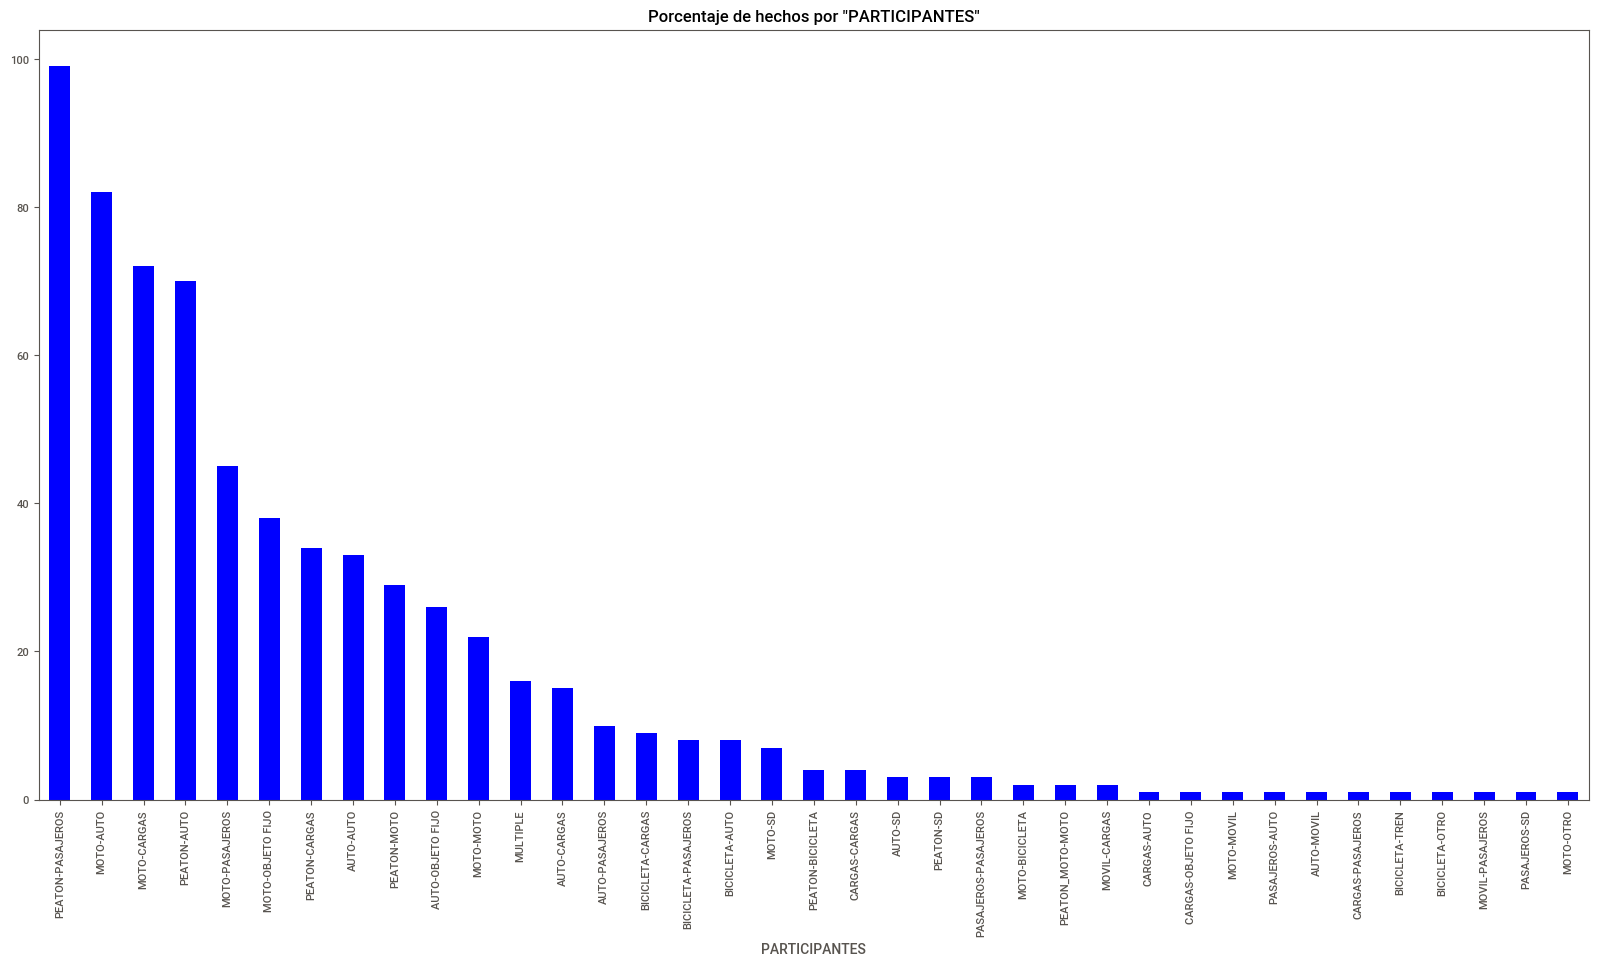

In [40]:
#Vemos la cantidad de hechos por "PARTICIPANTES" 

df['PARTICIPANTES'].value_counts().plot(kind='bar', color='blue', figsize=(20,10))
plt.title('Porcentaje de hechos por "PARTICIPANTES"')

Text(0.5, 1.0, 'Porcentaje de victimas de hechos en "VICTIMAS_x"')

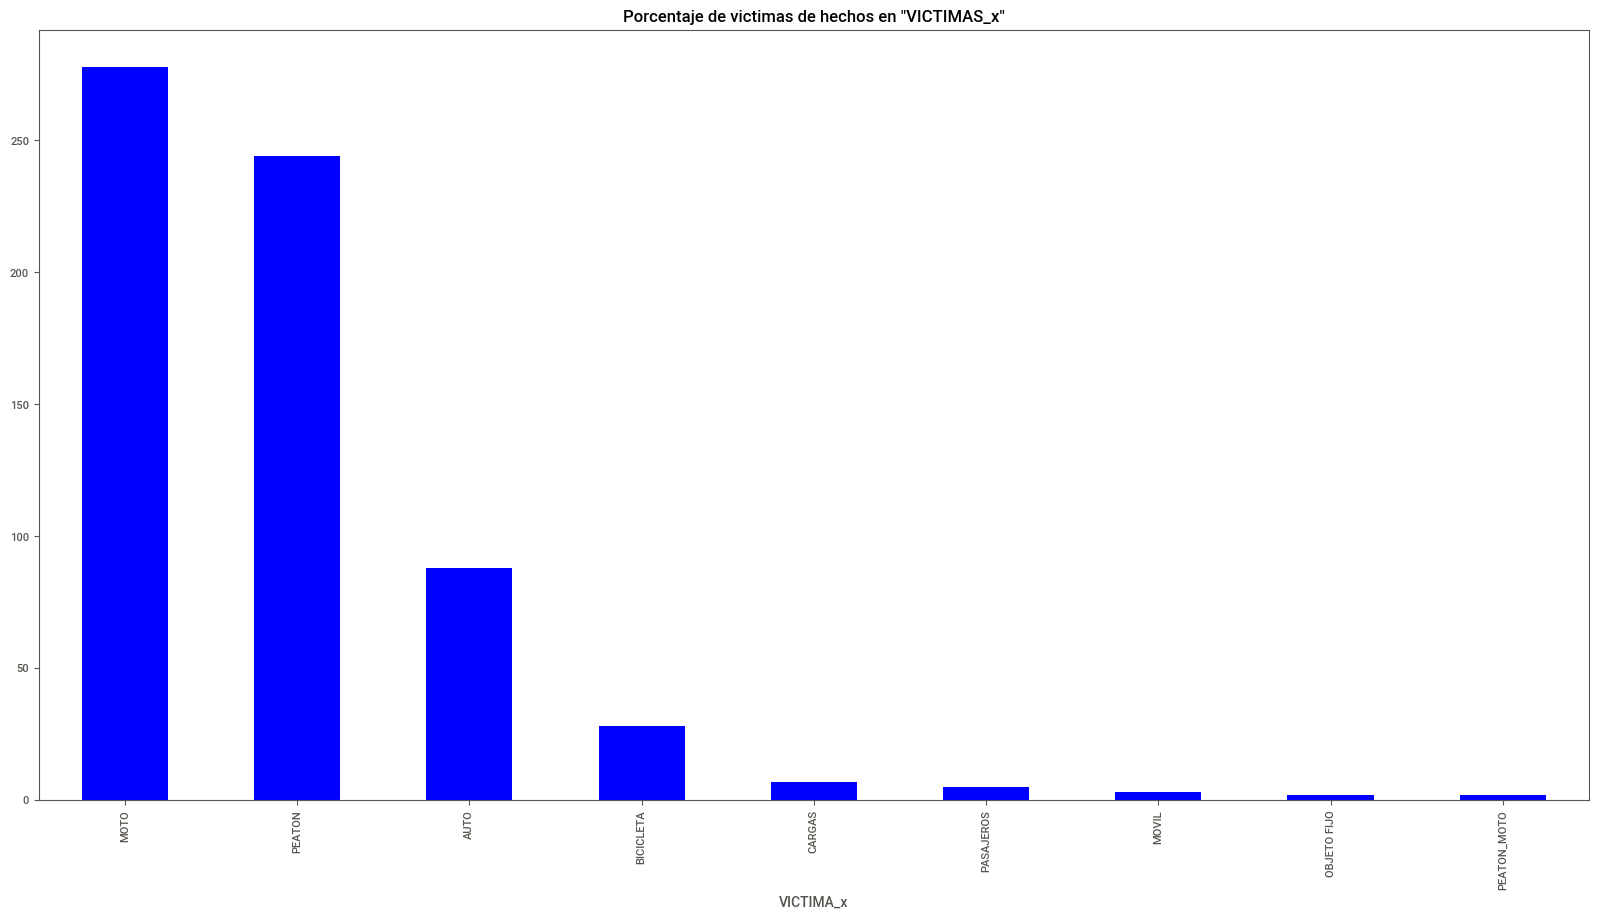

In [45]:
#Vemos el porcentaje de victimas de hechos en "VICTIMAS_x"

df['VICTIMA_x'].value_counts().plot(kind='bar', color='blue', figsize=(20,10))
plt.title('Porcentaje de victimas de hechos en "VICTIMAS_x"')

Text(0.5, 1.0, 'Porcentaje de victimas de hechos en "VICTIMAS_y"')

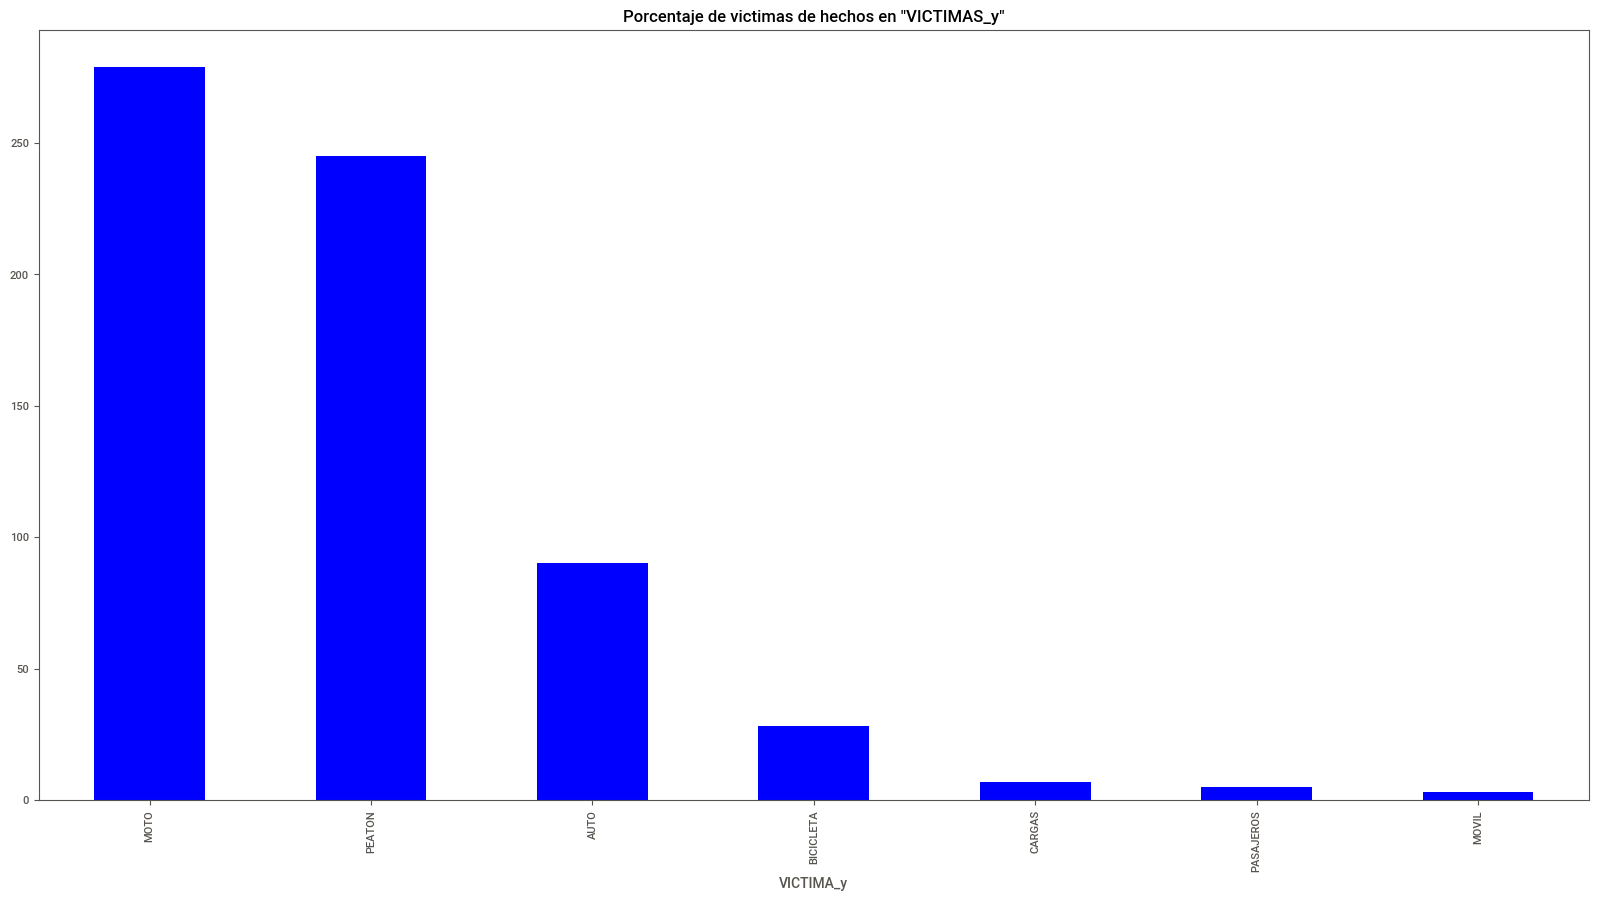

In [46]:
#Vemos el porcentaje de victimas de hechos en "VICTIMAS_y"

df['VICTIMA_y'].value_counts().plot(kind='bar', color='blue', figsize=(20,10))
plt.title('Porcentaje de victimas de hechos en "VICTIMAS_y"')

Text(0.5, 0, 'ACUSADO')

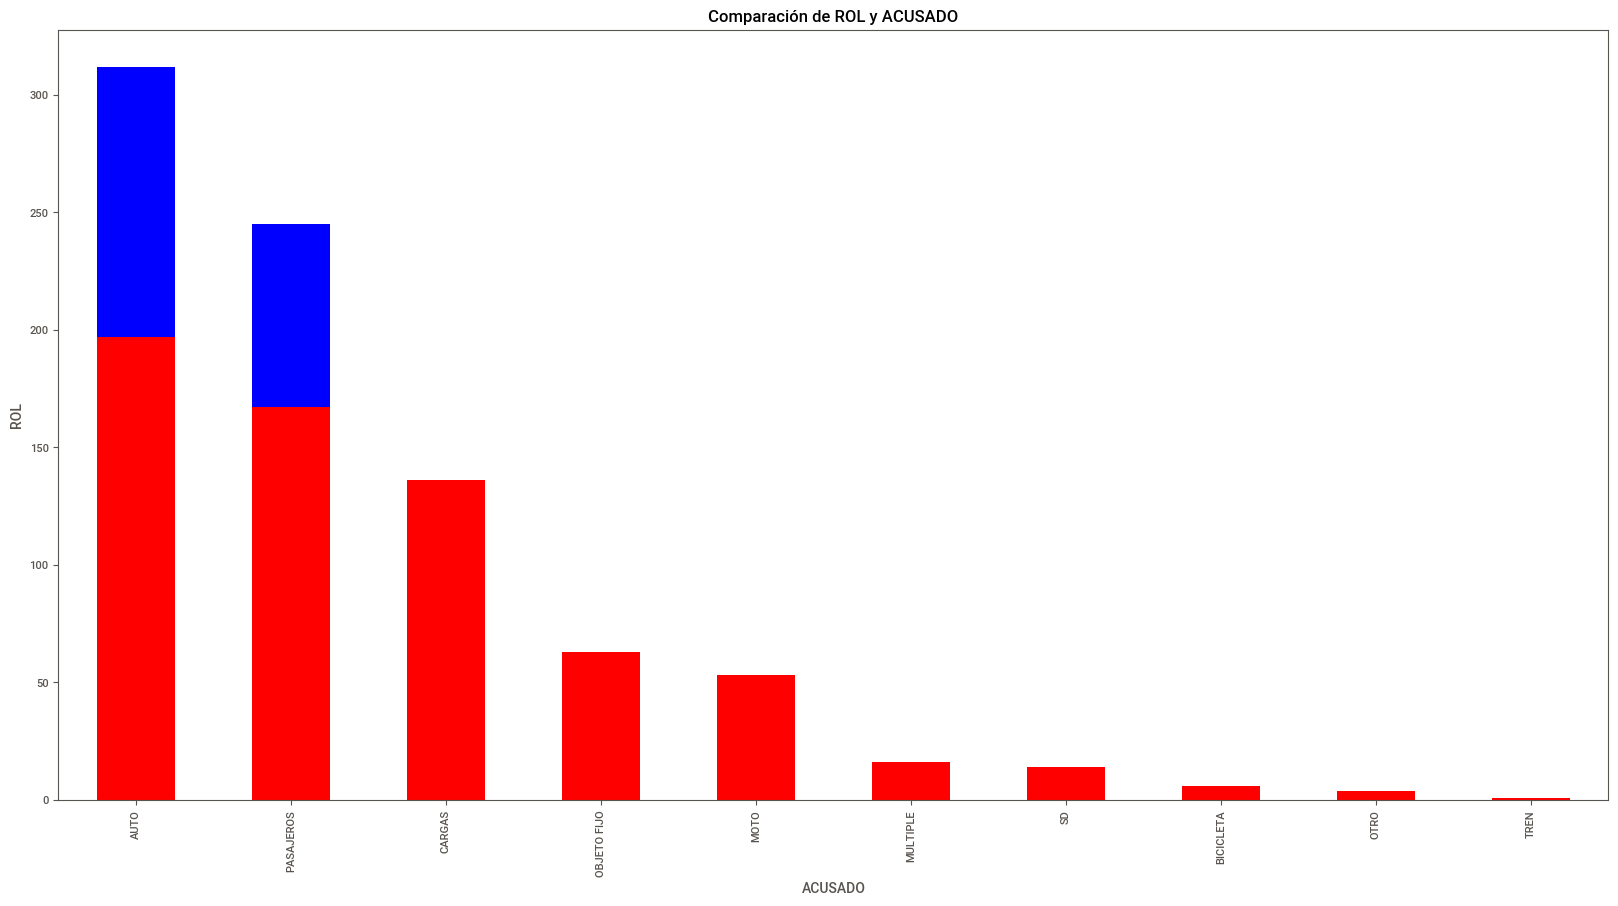

In [49]:
#En un grafico comparamos ROL y ACUSADO

df['ROL'].value_counts().plot(kind='bar', color='blue', figsize=(20,10))
df['ACUSADO'].value_counts().plot(kind='bar', color='red', figsize=(20,10))
plt.title('Comparación de ROL y ACUSADO')
plt.ylabel('ROL')
plt.xlabel('ACUSADO')